# Linear Regression From Scratch.

    Divyanshu Vyas | dvyas13ad@gmail.com
    
    This Notebook will help us understand how we can perform Linear Regresssion with Just basic Python Knowledge.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
x1 = np.random.random(10000)
x2 = np.random.random(10000)
x3 = np.random.random(10000)

In [98]:
y = x1 +5*x2 - 10*x3 + 20

w_actual = [1 , 5, -10]
b_actual = 20

In [99]:
df = pd.DataFrame({'x1':x1 , 'x2':x2 , 'x3' :x3 , 'y':y})

In [100]:
X = np.array(df[['x1' , 'x2' , 'x3']])

y = np.array(df['y']).reshape(10000,1)

In [101]:
def cost(w,b,X,y):
    
    #X - 10000x3
    #y - 10000x1
    #w - 3x1
    #b = 1x1
    
    Z = np.dot(X , w) + b
    
    L = (y - Z)**2
    
    m = len(y)
    
    J = np.sqrt((1/m)*np.sum(L))
    
    return J
    

# Some Formulas

## 1. $ J(w,b) = \frac {1}{m} \sum [y - (W.X + b)]^2 $

## 2. $ \frac {\partial J}{\partial W} = \frac {-2}{m} (X^T . [y - (W.X + b)]) $

## 3. $ \frac {\partial J} {\partial b} = \frac {-2}{m} \sum [ y - (W.X + b) ] $

In [102]:
def gradient(w,b,X,y):
    
    #dw = dJ/dw = 3x1
    #db = dJ/db = 1x1
    
        
    #X - 10000x3
    #y - 10000x1
    #w - 3x1
    #b = 1x1
    
    Z = np.dot(X , w) + b
    
    J = cost(w,b,X,y)
    
    m = X.shape[0]
    
    dw = (-2/m)*np.dot(X.T , (y - Z))
    
    db = (-2/m)*np.sum(y - Z)
    
    return dw , db
    
    

In [30]:
# X.shape

# y.shape

In [113]:
#Just a check on how terrible our initial guess is performing.
w = np.random.random((3,1))
b = 0

cost(w,b,X,y)

17.48268154108733

# Now Let's Make it Learn!

In [114]:
def learning(w,b,X,y,epoch):
    
    #dw = dJ/dw = 3x1
    #db = dJ/db = 1x1
    
    #X - 10000x3
    #y - 10000x1
    #w - 3x1
    #b = 1x1
    
    Z = np.dot(X , w) + b
    
    costs = []
    
    costs.append(cost(w,b,X,y))
    
    for e in range(epoch):
        
        dw , db = gradient(w,b,X,y)
        
        w = w - 0.005*dw
        
        b = b - 0.005*db
        
        if e%100 == 0:
            costs.append(cost(w,b,X,y))
        
    
    wf = w
    bf = b
    
    return wf , bf , costs
    
    
    
        
        
    
    
    
    

In [115]:
wf , bf , costs = learning(w,b,X,y,10000)

In [116]:
wf , bf

(array([[ 1.0657494 ],
        [ 5.06359242],
        [-9.92998038]]),
 19.895068110806836)

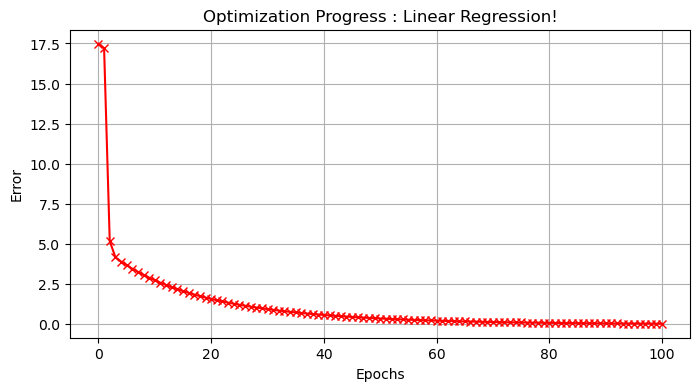

In [117]:
plt.figure(figsize = (8,4))
plt.style.use('default')
plt.plot(costs ,c='red' , marker='x')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Optimization Progress : Linear Regression!')

plt.grid()

In [126]:
Actual = ['w1 = 1' , 'w2 =5' , 'w3 = -10', 'b = 20']

ModelResults = [f'w1 = {wf[0][0]}' ,f'w2 = {wf[1][0]}',f'w3 = {wf[2][0]}', f'b = {bf}' ]

In [128]:
results = pd.DataFrame({'Actual Parameters':Actual , 'Model-Parameters':ModelResults})

In [129]:
results

,Actual Parameters,Model-Parameters
0,w1 = 1,w1 = 1.0657494018932743
1,w2 =5,w2 = 5.063592418656829
2,w3 = -10,w3 = -9.92998037745159
3,b = 20,b = 19.895068110806836
